# Import the libraries and load the MNIST dataset

### Traning samples: 60000       |              Testing samples: 10000 

In [1]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow.keras.layers import Flatten, Dense, Conv2D 
from tensorflow.keras.layers import MaxPooling2D, Dropout 
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Importing the MNIST dataset from keras library
data = tf.keras.datasets.mnist

In [3]:
# Splitting the MNIST dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = data.load_data()

# Preprocess the data

In [4]:
# Checking the values of each pixel of any random index before normalising the training set
print(x_train[128])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 253 253  63
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 252 252 144
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 217 252 252 144
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  63 237 252 252 144
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 109 252 25

In [5]:
# Checking maximum value of the channel to know if images are in gray level
x_train.max()

255

In [6]:
# Normalizing 
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [7]:
# Checking the values of each pixel after normalizing the sets
print(x_test[128])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
# Checking the shape of the data sets
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
# In order to make images 4D, we need to reshape them
# Reshaping image in order to suit it for convolution operation
input_shape = [28, 28, 1]
x_train = x_train.reshape(len(x_train), input_shape[0], input_shape[1], input_shape[2])
x_test = x_test.reshape(len(x_test), input_shape[0], input_shape[1], input_shape[2])

In [10]:
# Checking the shape of the data sets after reshaping
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Create the model

In [11]:
# Creating a neural network
model = Sequential()

# First CNN layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=[28, 28, 1]))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Second CNN layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third CNN layer
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layers 
model.add(Flatten())
model.add(Dropout(0.5)) #Regularizing
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

# Summarizing the performance of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [12]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model 

In [13]:
# Training the model
history = model.fit(x_train, y_train, batch_size=10, epochs=15, validation_data=(x_test, y_test), validation_split=0.3)

Epoch 1/15
4200/4200 [==============================] - 87s 20ms/step - loss: 0.3038 - accuracy: 0.9032 - val_loss: 0.0702 - val_accuracy: 0.9793
Epoch 2/15
4200/4200 [==============================] - 96s 23ms/step - loss: 0.1155 - accuracy: 0.9645 - val_loss: 0.0596 - val_accuracy: 0.9815
Epoch 3/15
4200/4200 [==============================] - 93s 22ms/step - loss: 0.0912 - accuracy: 0.9720 - val_loss: 0.0444 - val_accuracy: 0.9871
Epoch 4/15
4200/4200 [==============================] - 67s 16ms/step - loss: 0.0750 - accuracy: 0.9775 - val_loss: 0.0406 - val_accuracy: 0.9882
Epoch 5/15
4200/4200 [==============================] - 64s 15ms/step - loss: 0.0668 - accuracy: 0.9798 - val_loss: 0.0439 - val_accuracy: 0.9878
Epoch 6/15
4200/4200 [==============================] - 96s 23ms/step - loss: 0.0612 - accuracy: 0.9814 - val_loss: 0.0410 - val_accuracy: 0.9889
Epoch 7/15
4200/4200 [==============================] - 94s 22ms/step - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0412 -

# Save the model

In [14]:
# Saving our trained model
model.save('HAMARA_PYARA_MODEL.keras')
print("[INFO] Model is saved successfully.")

[INFO] Model is saved successfully.


# Evaluate the model using MNIST test samples

In [15]:
# Ensuring if "HAMARA_PAYARA_MODEL" is worth training
performance = model.evaluate(x_test, y_test, verbose=0)
loss = performance[0]
accuracy = performance[1]
print("[LOSS]: ",loss)
print("[ACCURACY]: ",accuracy)

[LOSS]:  0.0306325051933527
[ACCURACY]:  0.9930999875068665


In [16]:
# Preparing to predict "HAMARA_PAYARA_MODEL"
prediction = model.predict(x_test)

In [17]:
# TRIAL NO. - 1
# Predicting "HAMARA_PAYARA_MODEL" taking random index inputs
predictionMax = np.argmax(prediction[127])

# Printing model's O/P
print("[O/P] HAMARA_PAYARA_MODEL says: It's a",predictionMax)

[O/P] HAMARA_PAYARA_MODEL says: It's a 5


It's a 5


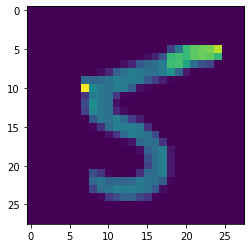

In [18]:
# Checking whether the O/P is correct or not by plotting the image at index 127
plt.imshow(x_test[127])
print("It's a 5")

In [19]:
# TRIAL NO. - 2
# Predicting "HAMARA_PAYARA_MODEL" taking random index inputs
predictionMax2 = np.argmax(prediction[0])

# Printing model's O/P
print("[O/P] HAMARA_PAYARA_MODEL says: It's a",predictionMax2)

[O/P] HAMARA_PAYARA_MODEL says: It's a 7


It's 7(MY FAV DIGIT)


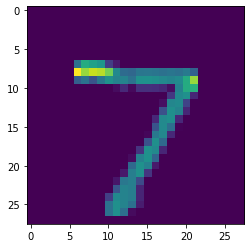

In [20]:
# Checking whether the O/P is correct or not by plotting the image at index 0
plt.imshow(x_test[0])
print("It's 7(MY FAV DIGIT)")